In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive')
os.listdir()


['Colab Notebooks',
 'YoloDeneme.ipynb',
 'ICDAR-2019-SROIE',
 'ForPickPytorch',
 'train_samples_list.csv',
 'PICK-pytorch-old',
 'Pick.Pytorch.Sroie',
 'vision-captioning',
 'vision-deepface',
 'vision-banknote',
 'Object_detection_image_edited.py',
 'vision-captioning1',
 'vision-object',
 'tensorflow-yolo-v3',
 'yolo-v3',
 'yolov3',
 '.ipynb_checkpoints']

In [ ]:
cd yolo-v3/

/content/gdrive/MyDrive/yolo-v3


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# change makefile to have GPU and OPENCV enabled

%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-06-06 17:46:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  37.1MB/s    in 6.9s    

2021-06-06 17:46:43 (34.0 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [ ]:
# define helper functions for instance imshow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

Making prediction test on own image by darknet

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Jun  6 2021 - 17:42:10 

 CUDA Error: no CUDA-capable device is detected
CUDA Error: no CUDA-capable device is detected: Bad file descriptor
darknet: ./src/utils.c:331: error: Assertion `0' failed.


In [ ]:
!pwd

In [ ]:
#dowloading pretrained weights for conv layers darkne53
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-06-06 17:46:44--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  37.3MB/s    in 4.8s    

2021-06-06 17:46:49 (32.1 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [ ]:
#start training
!./darknet detector train train-datasett/class.data yolov3.cfg darknet53.conv.74 -dont_show

In [ ]:
%cd darknet/

/content/gdrive/My Drive/yolov3/darknet


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3.cfg
%cd ..

/content/gdrive/My Drive/yolov3/darknet/cfg
/content/gdrive/My Drive/yolov3/darknet


In [ ]:
#testing
!./darknet detector test train-datasett/class.data yolov3.cfg /content/gdrive/MyDrive/yolov3/darknet/yolov3_last.weights /content/gdrive/MyDrive/yolov3/darknet/IMG_4333.JPG -thresh 0.3


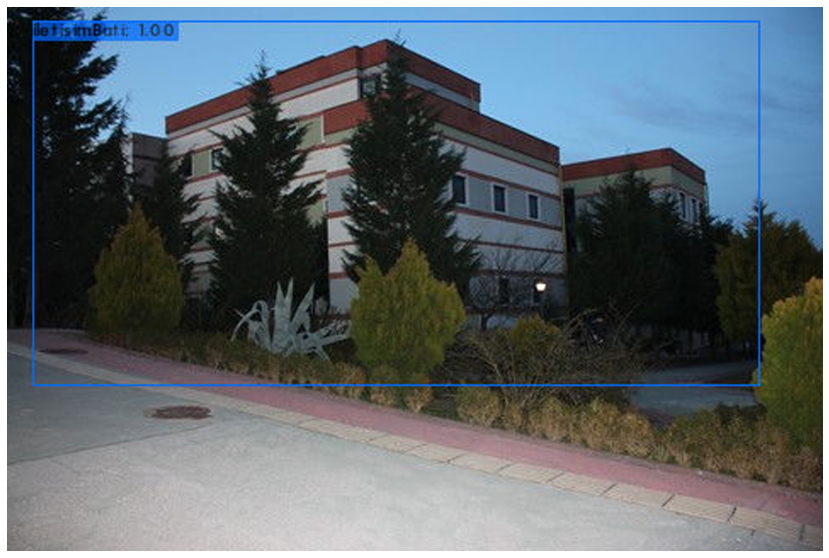

In [ ]:
imShow('predictions.jpg')

In [ ]:
!ls

data	    detect.py  load_weights.py	README.md	  utils.py  yolo_v3.py
detections  LICENSE    __pycache__	requirements.txt  weights


In [ ]:
!pwd

/content/gdrive/My Drive/yolo-v3


In [ ]:
pip install --upgrade --force-reinstall tensorflow

In [ ]:
#This for converting .weights file to tensorflow checkpoint
!python load_weights.py

2021-06-09 11:53:42.299476: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:308: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependen